In [4]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [5]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [9]:

# Step 2: Set directories
train_dir ="C:\\Users\\rida6\\Downloads\\archive\\Training"
val_dir = "C:\\Users\\rida6\\Downloads\\archive\\Validation"

In [10]:

# Step 3: Image preprocessing
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Step 4: Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Step 5: Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train model
history = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=3,
    validation_data=val_data,
    validation_steps=5
)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Epoch 1/3
10/10 [==============================] - 7s 646ms/step - loss: 1.1559 - accuracy: 0.5156 - val_loss: 0.6870 - val_accuracy: 0.4938
Epoch 2/3
10/10 [==============================] - 6s 625ms/step - loss: 0.6891 - accuracy: 0.5813 - val_loss: 0.6615 - val_accuracy: 0.7437
Epoch 3/3
10/10 [==============================] - 6s 631ms/step - loss: 0.6435 - accuracy: 0.6531 - val_loss: 0.6176 - val_accuracy: 0.6625


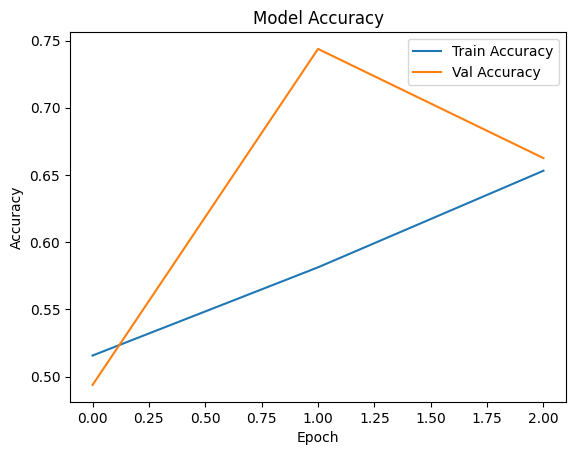

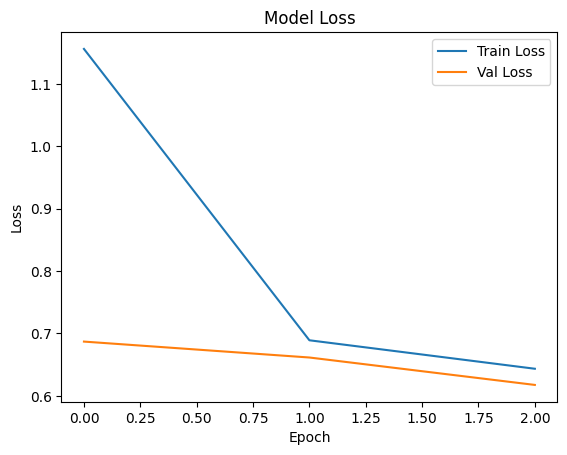

In [11]:

# Step 7: Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.save('gender_model.h5')
print("✅ Model saved successfully!")

✅ Model saved successfully!


1/1 [==============================] - 0s 67ms/step
 Prediction: Male


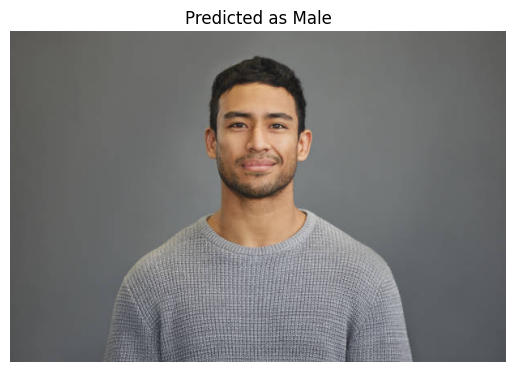

In [15]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('gender_model.h5')

# Give path of test image
img_path = 'C:\\Users\\rida6\\OneDrive\\Desktop\\istockphoto-1335941248-612x612.jpg'

# Load and preprocess
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Predict
prediction = model.predict(img)

# Result
label = "Female" if prediction[0][0] > 0.5 else "Male"
print(f" Prediction: {label}")

# Show image
img_display = cv2.imread(img_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.title(f"Predicted as {label}")
plt.axis('off')
plt.show()
